In [17]:
#imports 
import pandas as pd

In [18]:
# read in semi clean df
child = pd.read_csv('../data/semi_clean_df.csv')
# filter UNHAP42 to only 1-4
hap_filter =(child['UNHAP42'] == 0) | (child['UNHAP42'] == 1) | (child['UNHAP42'] == 2) | (child['UNHAP42'] == 3) | (child['UNHAP42'] == 4)
# set df equal to origin dataframe with above filter
df = child[hap_filter]
# create classes for UNHAP42 
df['UNHAP42'] = df['UNHAP42'].map({0:0, 1:1, 2:1, 3:1, 4:1})
# check class distribution
df['UNHAP42'].value_counts(normalize=True)

0    0.736149
1    0.263851
Name: UNHAP42, dtype: float64

In [19]:
# imports for modeling
# import logistic regression
from sklearn.linear_model import LogisticRegression

# import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# logistic regression pipe
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#impor numpy 
import numpy as np

In [20]:
# set X, y 
X = df.drop(columns='UNHAP42')
y = df['UNHAP42']

In [21]:
#TTS
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [22]:
# define pipeline
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('logreg', LogisticRegression())
])

In [23]:
# define grid search params
params = {'sc__with_mean': [True, False],
          'sc__with_std' : [True, False],
          'logreg__C'          : np.linspace(0, 1, 5),
          'logreg__max_iter'   : [500,1000],
          'logreg__penalty'    : ['l1', 'l2'],
          'logreg__solver'     : ['liblinear'],
          'logreg__class_weight': [None, 'balanced']
}

In [24]:
# create grid
grid = GridSearchCV(pipe, params, cv=5)

In [25]:
# fir grid 
grid.fit(X_train, y_train)

C:\Users\phill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\phill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\phill\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\phill\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm\_liblinear.pyx", line 52, in sklearn.svm._liblinear.train_wrap
ValueError: b'C <= 0'

  warnin

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'logreg__class_weight': [None, 'balanced'],
                         'logreg__max_iter': [500, 1000],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear'],
                         'sc__with_mean': [True, False],
                         'sc__with_std': [True, False]})

Logistic Regression Results

Best Parameters from GridSearch:
{'logreg__C': 0.25, 'logreg__class_weight': None, 'logreg__max_iter': 500, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear', 'sc__with_mean': False, 'sc__with_std': False}

Train Score    :  0.8353603603603603
Test Score     :  0.8222972972972973
Accuracy Score :  0.8222972972972973
Recall Score   :  0.49230769230769234


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1090
           1       0.75      0.49      0.59       390

    accuracy                           0.82      1480
   macro avg       0.79      0.72      0.74      1480
weighted avg       0.81      0.82      0.81      1480



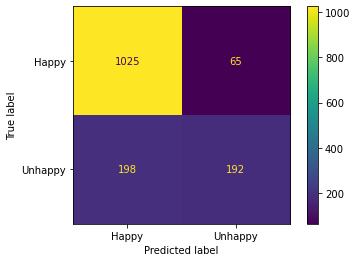

In [27]:
# create a summary of results from the grid search
print('Logistic Regression Results')
print('')
print('Best Parameters from GridSearch:')
print(grid.best_params_)
print('')
print('Train Score    : ', grid.score(X_train, y_train))
print('Test Score     : ', grid.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, grid.predict(X_test)))
print('Recall Score   : ', recall_score(y_test, grid.predict(X_test)))
print('')
# print and plot confusion matrix
cm = confusion_matrix(y_test, grid.predict(X_test))
ConfusionMatrixDisplay(cm, display_labels=['Happy', 'Unhappy']).plot();
print('')
# print classification report
print(classification_report(y_test, grid.predict(X_test)))

### Note:
This model actually increased the gap between training and testing scores, so in this case an attempt to introduce regularization hurt the model and also dropped recall.  The next modeling attempt will be to add Smote in an attempt to balance classes.